# Spotify Recomendator


Você provavelmente já se deparou com uma situação como essa, ou se não se deparou, agora vai se identificar em algum ponto. Quando toca uma música e pensa: muito boa essa música que tocou, nunca tinha ouvido, e é bem parecida com aquela outra. Parece que ela até tem umas baterias bem parecidas. Será que elas são relacionadas, alguma coisa assim? Vamos ver

Vamos utilizar a API do Spotify e pegar alguns dados diretamente de lá. As features que vamos analisar estão listadas no link: https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features


In [74]:
import pandas as pd
import numpy as np

dados_musicas = pd.read_csv('./Dados_totais.csv')
dados_por_generos = pd.read_csv('./data_by_genres.csv')
dados_por_ano = pd.read_csv('./data_by_year.csv')

### Análise dos dados
Vamos realizar uma análise do dataframe gerado.

In [75]:
dados_musicas.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [76]:
dados_por_generos.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [77]:
dados_por_ano.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


In [78]:
dados_musicas['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Como os dados das nossas músicas só corresponde à musicas depois dos anos 2000, vamos filtrar os dados dos anos para termos somente dados que correspondem à anos >= 2000

In [79]:
dados_por_ano = dados_por_ano[dados_por_ano['year']>=2000]
dados_por_ano.reset_index()

,index,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
1,80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7
2,81,1,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500,7
3,82,1,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407,7
4,83,1,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143,7
5,84,1,2005,0.255764,0.572281,237229.588205,0.653209,0.090194,0.190082,-7.466159,0.093334,121.617967,0.532531,50.953333,0
6,85,1,2006,0.279986,0.568230,234042.914359,0.650326,0.077701,0.188289,-7.265501,0.085847,121.798615,0.520028,51.313846,7
7,86,1,2007,0.254081,0.563414,241049.962564,0.668305,0.072957,0.196127,-7.044536,0.084347,124.087516,0.516794,51.075897,7
8,87,1,2008,0.249192,0.579193,240107.315601,0.671461,0.063662,0.198431,-6.843804,0.077356,123.509934,0.527542,50.630179,0
9,88,1,2009,0.261929,0.564190,238140.013265,0.670749,0.075872,0.205252,-7.046015,0.085458,123.463808,0.507170,51.440816,0


In [80]:
dados_por_ano.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7


In [81]:
dados_musicas.shape

(20311, 19)

De acordo com o link citado anteriormente (https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features), existem algumas features que não tem importância para o nosso caso. Dessa forma, vamos remover essas colunas desnecessárias do nosso dataframe

In [82]:
dados_musicas = dados_musicas.drop(['explicit', 'key', 'mode'], axis=1)
dados_musicas.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


O mesmo pode ser feito para os outros dataframes.

In [83]:
dados_por_generos = dados_por_generos.drop(['mode', 'key'], axis=1)
dados_por_ano = dados_por_ano.drop(['mode', 'key'], axis=1)

In [84]:
dados_por_generos.head(2)
dados_por_ano.head(2)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125


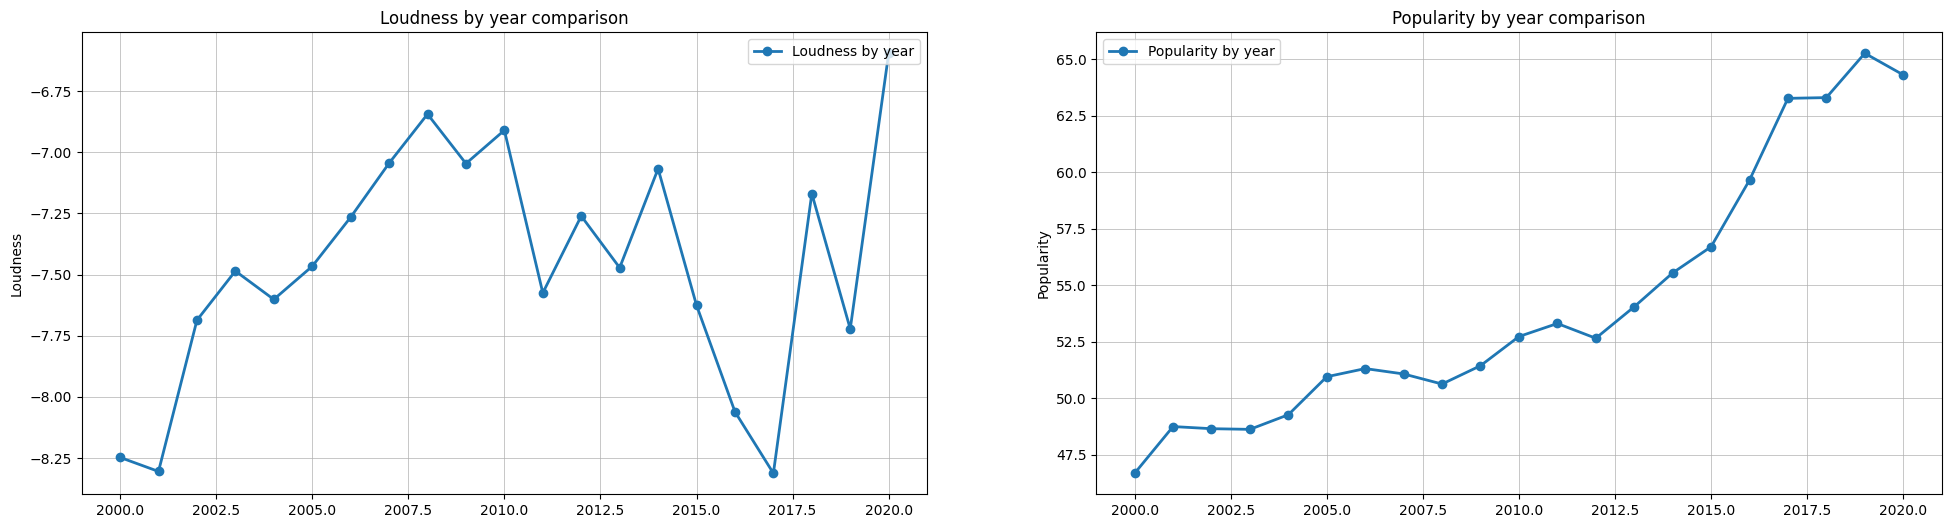

In [92]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(24,6))

axes[0].plot(dados_por_ano['year'], dados_por_ano['loudness'], marker='o', linewidth=2.0, label="Loudness by year")
axes[0].set_ylabel("Loudness")
axes[0].set_title(f'Loudness by year comparison')
axes[0].grid(axis='y', linestyle='-', linewidth=0.5)
axes[0].grid(axis='x', linestyle='-', linewidth=0.5)
axes[0].legend(loc='upper right')

axes[1].plot(dados_por_ano['year'], dados_por_ano['popularity'], marker='o', linewidth=2.0, label="Popularity by year")
axes[1].set_ylabel("Popularity")
axes[1].set_title(f'Popularity by year comparison')
axes[1].grid(axis='y', linestyle='-', linewidth=0.5)
axes[1].grid(axis='x', linestyle='-', linewidth=0.5)
axes[1].legend(loc='upper left')

#axes[2].pie(dados['tratamento'].value_counts(), labels=['Com droga', 'Com controle'], autopct='%1.1f%%', startangle=90)
#axes[2].axis('equal')

In [114]:
dados = dados_musicas[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity']]

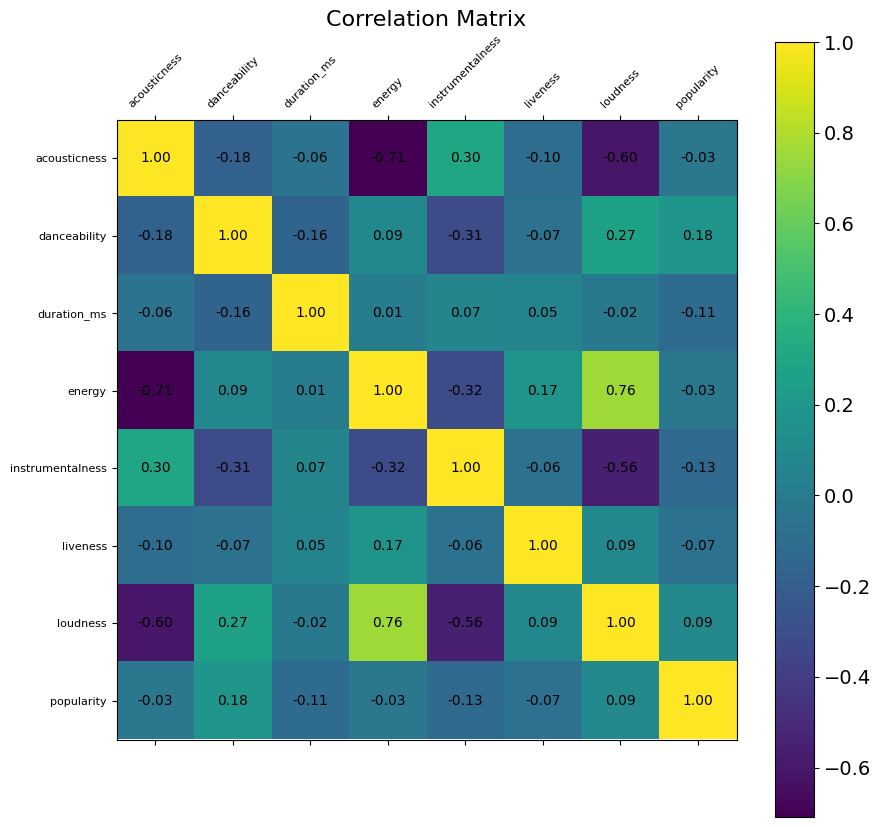

In [147]:
f = plt.figure(figsize=(10, 10))
plt.matshow(dados.corr(), fignum=f.number)
plt.xticks(range(dados.shape[1]), dados.columns, fontsize=8, rotation=45)
plt.yticks(range(dados.shape[1]), dados.columns, fontsize=8)

for (i, j), z in np.ndenumerate(dados.corr()):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='black')

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);